<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers

# Import data

In [6]:
train_dir = 'train' 
validation_dir = 'valid' 
test_dir = 'test'

In [7]:
import pathlib

#Define train, test, validation data paths dir 
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)
validation_dir = pathlib.Path(validation_dir)

In [8]:
train_image_count = len(list(train_dir.glob('*/*.jpg')))
test_image_count = len(list(test_dir.glob('*/*.jpg')))
validation_image_count = len(list(validation_dir.glob('*/*.jpg')))

print('There are ', train_image_count, 'images in the train dir.')
print('There are ', test_image_count, 'images in the test dir.')
print('There are ', validation_image_count, 'images in the validation dir.')

There are  1870 images in the train dir.
There are  75 images in the test dir.
There are  75 images in the validation dir.


In [9]:
#Import PIL to visualize an image axample
import PIL
import PIL.Image

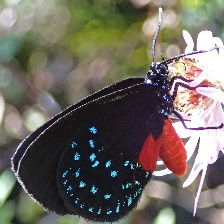

In [10]:
#Image examples
butterflies = list(train_dir.glob('ATALA/*'))
PIL.Image.open(str(butterflies[0]))

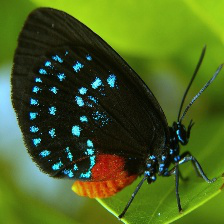

In [12]:
PIL.Image.open(str(butterflies[2]))

# Load data using a Keras utility

In [14]:
#Define some parameters
batch_size = 100
img_height = 224
img_width = 224
n_train = 1870
steps_per_epoch = n_train//batch_size

In [ ]:
#resized images using the image_size argument of 'image_dataset_from_directory'

In [15]:
#Trainset 
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1870 files belonging to 15 classes.


In [16]:
#Testset
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75 files belonging to 15 classes.


In [17]:
#Validationset
validation_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75 files belonging to 15 classes.


In [18]:
train_ds.class_names

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ARCIGERA FLOWER MOTH',
 'ATALA',
 'ATLAS MOTH',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BANDED TIGER MOTH',
 'BECKERS WHITE',
 'BIRD CHERRY ERMINE MOTH',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO']

In [20]:
len(train_ds.class_names)

15

In [21]:
#Check that all sets have the same clases
#List of classes in each dataset
train_class_names = train_ds.class_names
test_class_names = test_ds.class_names
validation_class_names = validation_ds.class_names

#Check tha all lists have the same classes 
print(train_class_names == test_class_names == validation_class_names)

True


# Visualize the data

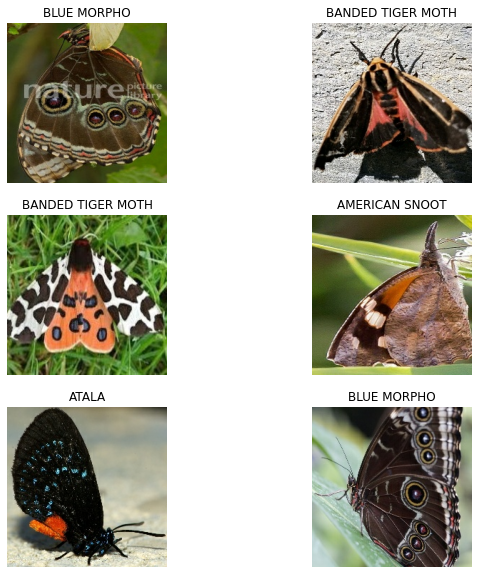

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
    for i in range(6):
        ax = plt.subplot(3, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_class_names[labels[i]])
        plt.axis("off")

In [ ]:
##Configure the dataset for performance Let's make sure to use buffered prefetching so we can yield data from disk without having I/O become blocking.
##These are two important methods you should use when loading data.

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Train the base models

In [24]:
num_classes = len(train_class_names)

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9

In [47]:
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
19/19 [==============================] - 103s 5s/step - loss: 0.2208 - accuracy: 0.9364 - val_loss: 0.5602 - val_accuracy: 0.8400
Epoch 2/5
19/19 [==============================] - 106s 6s/step - loss: 0.1049 - accuracy: 0.9733 - val_loss: 0.6151 - val_accuracy: 0.8267
Epoch 3/5
19/19 [==============================] - 114s 6s/step - loss: 0.0628 - accuracy: 0.9872 - val_loss: 0.9339 - val_accuracy: 0.8000
Epoch 4/5
19/19 [==============================] - 132s 7s/step - loss: 0.0513 - accuracy: 0.9893 - val_loss: 0.9715 - val_accuracy: 0.8000
Epoch 5/5
19/19 [==============================] - 151s 8s/step - loss: 0.0654 - accuracy: 0.9802 - val_loss: 0.8716 - val_accuracy: 0.7600


In [48]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.8716 - accuracy: 0.7600


In [49]:
scores

[0.871617317199707, 0.7599999904632568]

In [50]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 19}

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
history.history["loss"]

[0.22077766060829163,
 0.10485514253377914,
 0.06282604485750198,
 0.05131659656763077,
 0.06539318710565567]

In [56]:
history.history["accuracy"]

[0.9363636374473572,
 0.9732620120048523,
 0.9871657490730286,
 0.9893048405647278,
 0.9802138805389404]

In [61]:
#Accuracy values for train and validation data
mean_absolute_error= history.history['accuracy']
val_mean_absolute_error= history.history['val_accuracy']

#Loss function values for train and validation data
loss= history.history['loss']
val_loss= history.history['val_loss']

In [62]:
epochs= range(len(mean_absolute_error))
epochs

range(0, 5)

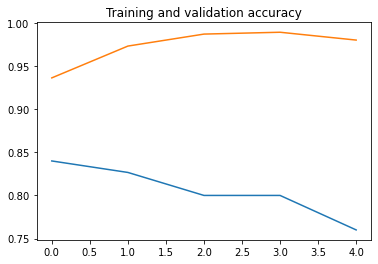

In [63]:
#Plot the model accuracy
plt.plot(epochs, val_mean_absolute_error)
plt.plot(epochs, mean_absolute_error)
plt.title ('Training and validation accuracy')
plt.show()

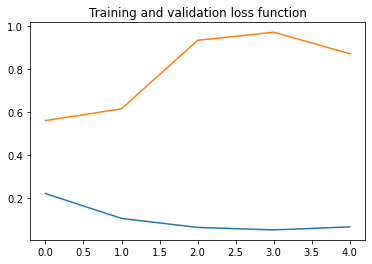

In [64]:
#Plot the model loss function 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title ('Training and validation loss function')
plt.show()

In [65]:
#Check the accuracy
test_loss, test_acc = model.evaluate(validation_ds, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 2s - loss: 0.8716 - accuracy: 0.7600 - 2s/epoch - 2s/step

Test accuracy: 0.7599999904632568
